 ## Exploratory data analysis. Data exploration and visualization
### Description of the dataset
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset - According to the World Health Organization (WHO) stroke (инсульт) is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


The dataset consists of one file:
healthcare.csv

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension //артериальная гипертензия

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease //порок сердца

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid")

In [4]:
# Dataset loading
data = pd.read_csv('downloads/healthcare.csv', sep=",")

In [5]:
# First 5 rows of the Dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#Size of Dataset
data.shape

(5110, 12)

In [7]:
#rows quantity
total_rows = data.shape[0]
print(f'rows quantity : {total_rows}')

rows quantity : 5110


In [8]:
#column list
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
#Column types
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
#empty values
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

id - 0
gender - 0
age - 0
hypertension - 0
heart_disease - 0
ever_married - 0
work_type - 0
Residence_type - 0
avg_glucose_level - 0
bmi - 201
smoking_status - 0
stroke - 0


In [11]:
#Basic statistical characteristics of the dataset
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Visual inspection of the Dataset

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

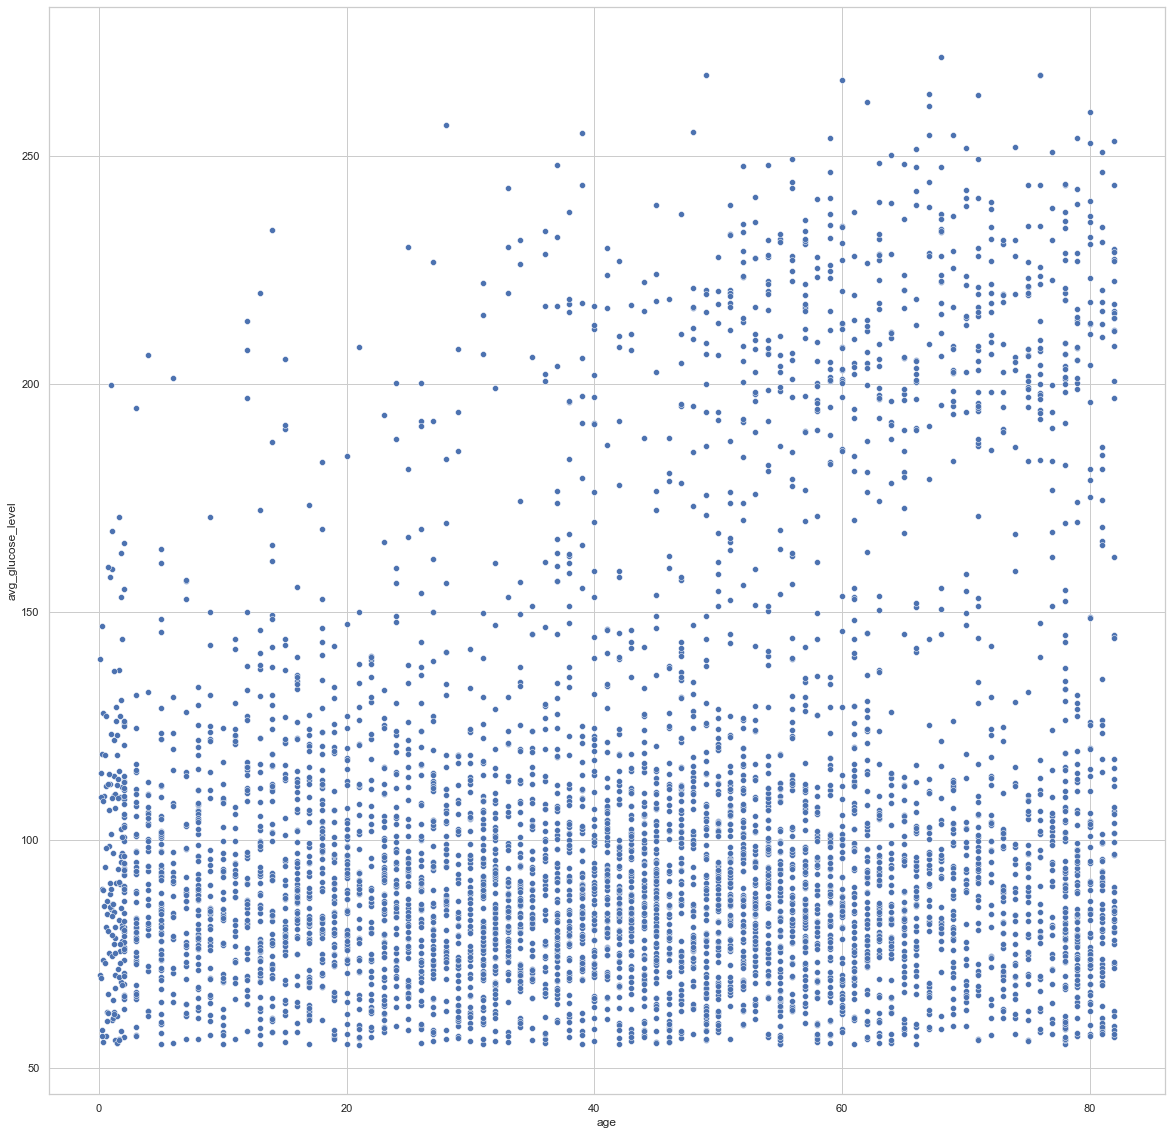

In [14]:
#Scatter plot
fig, ax = plt.subplots(figsize=(20,20)) 
sns.scatterplot(ax=ax, x='age', y='avg_glucose_level', data=data)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

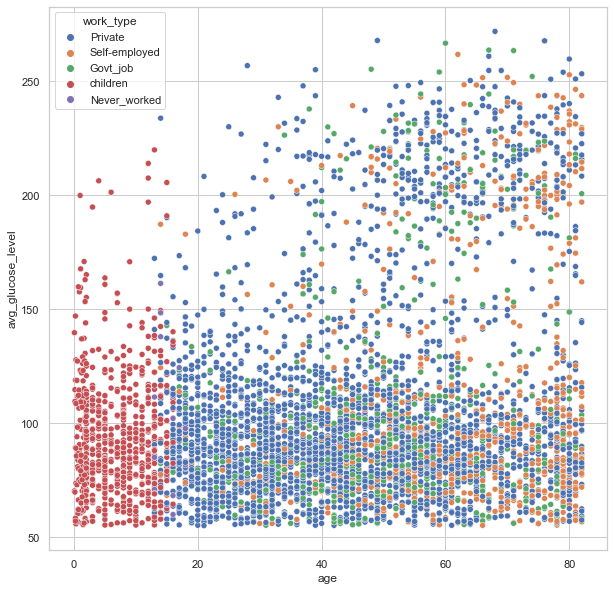

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='avg_glucose_level', data=data, hue="work_type")

/Users/spanchdie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

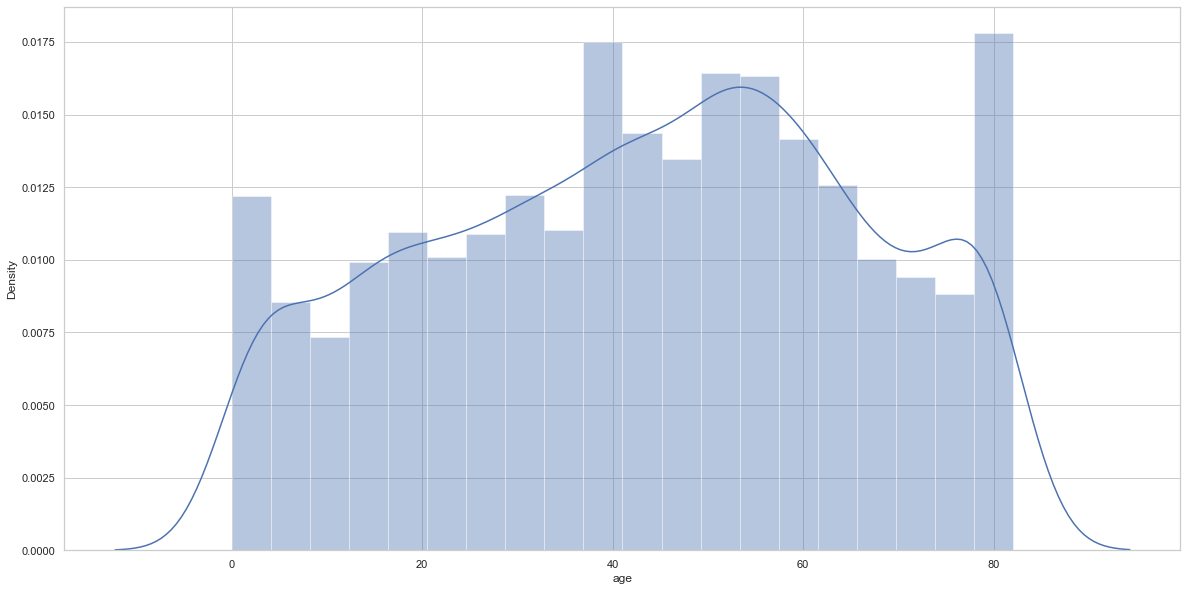

In [20]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.distplot(data['age'])

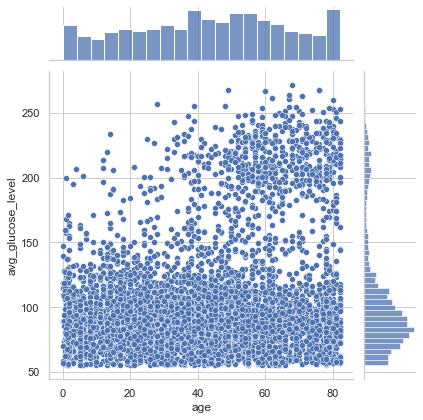

In [21]:
sns.jointplot(x='age', y='avg_glucose_level', data=data)

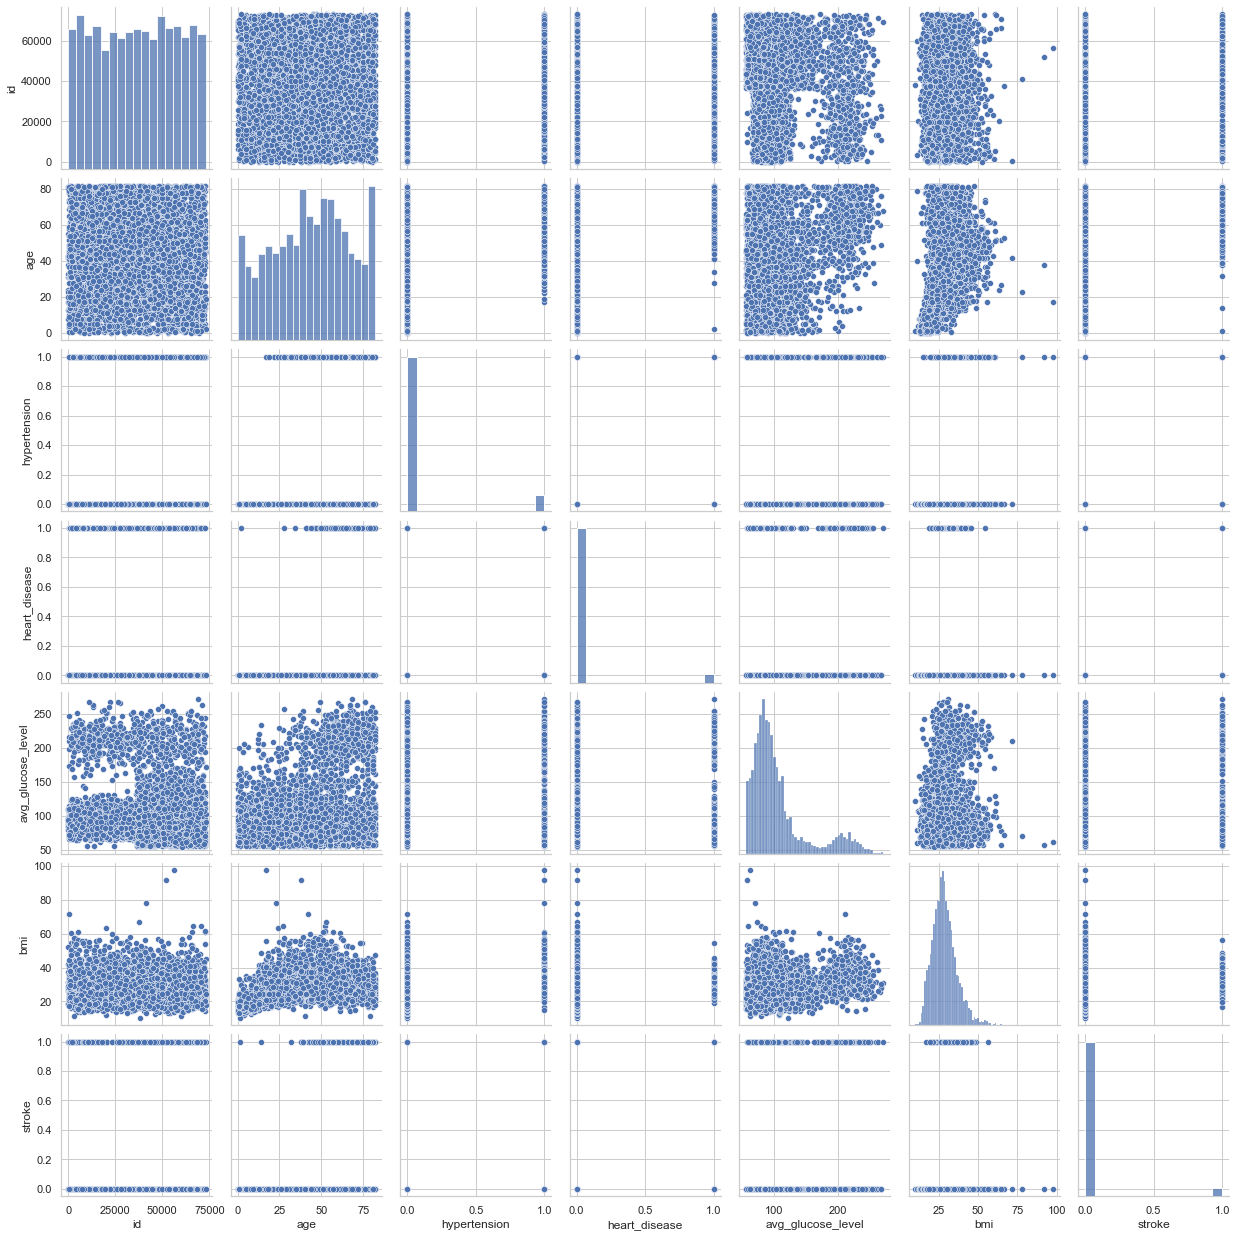

In [22]:
sns.pairplot(data)

<AxesSubplot:xlabel='age'>

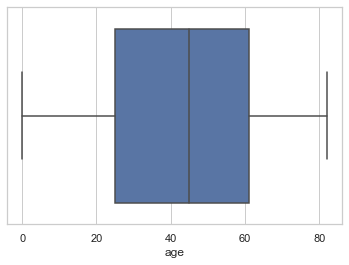

In [23]:
sns.boxplot(x=data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

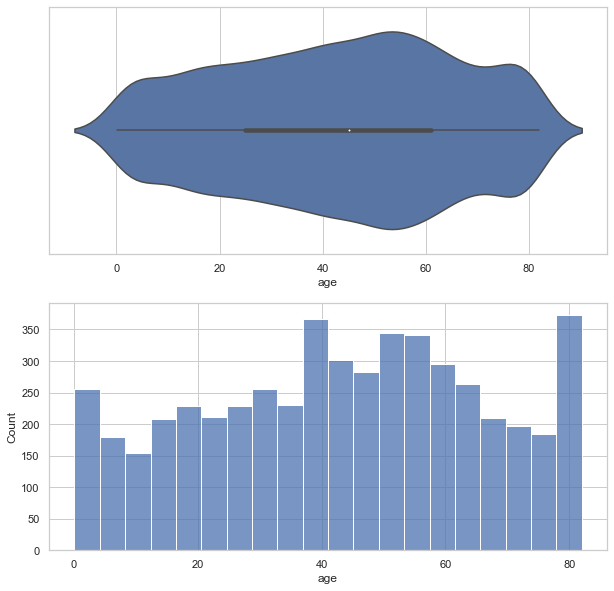

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['age'])
sns.histplot(data['age'], ax=ax[1])

скрипичный график отображает распределение плотности


## Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:
Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком. Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [28]:
#Correlation matrix
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

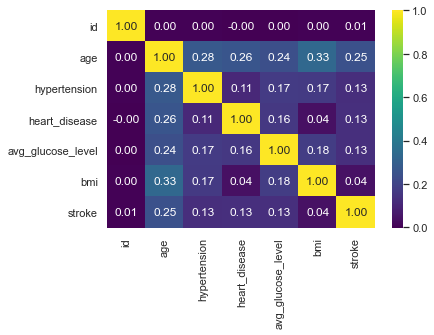

In [29]:
#Heatmap
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

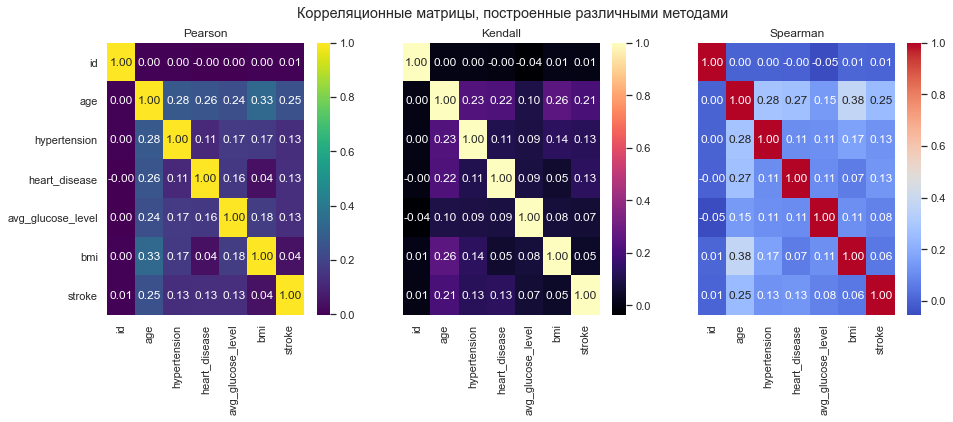

In [30]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), cmap='viridis', ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), cmap='magma', ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), cmap='coolwarm', ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')